# 信号処理シンポジウム分析

In [1]:
# モジュール
import os
import pandas as pd
from sipsymp import SipSymp
from sipwdc import SipWordCloud

In [2]:
# 対象年度の設定
syear = 2008
eyear = 2017

In [3]:
# 期間内の論文タイトル
path = './siprep{0}_{1}.csv'.format(syear,eyear)
df = pd.read_csv(path,index_col=0)

In [4]:
# SIPワードクラウドオブジェクトの生成
swc = SipWordCloud()

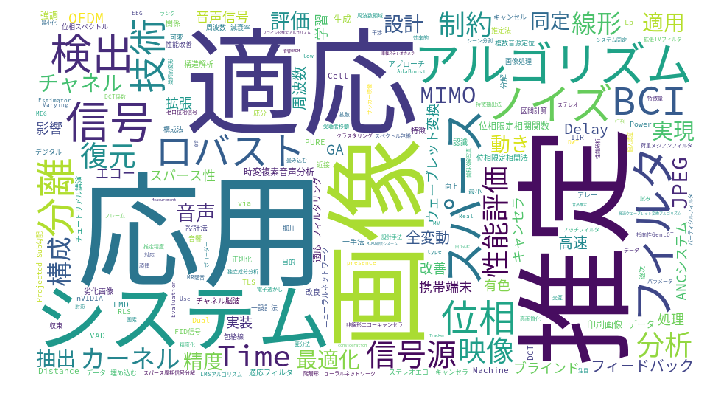

In [5]:
# 2008-2012のタイトルワードクラウド
df2008_2012 = df.loc[df.loc[:,'Year']<2013].reset_index(drop=True)
swc.generate(df2008_2012,'sipwdc2008_2012.png')

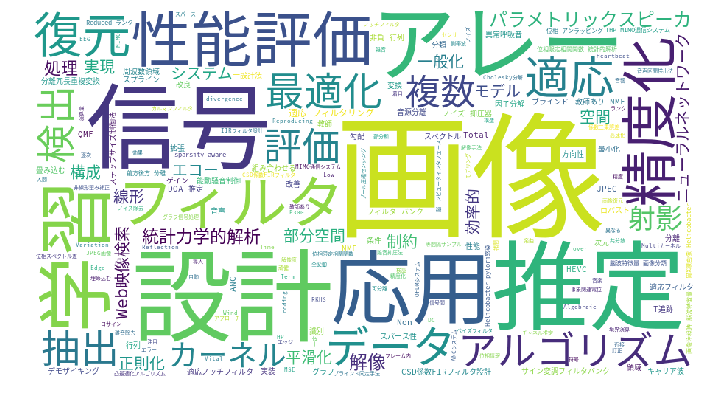

In [6]:
# 2013-2017のタイトルワードクラウド
df2013_2017 = df.loc[df.loc[:,'Year']>2012].reset_index(drop=True)
swc.generate(df2013_2017,'sipwdc2013_2017.png')